In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
df = pd.read_csv('Churn_Modelling.csv')

In [58]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [59]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)

In [60]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [61]:
df = pd.get_dummies(df, columns = ['Geography', 'Gender'], drop_first = True)

In [62]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [63]:
X = df.drop(columns = ['Exited'])
y = df['Exited']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

In [64]:
X_train.shape

(8000, 11)

In [65]:
y_train.shape

(8000,)

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [67]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [68]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [69]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [70]:
model = Sequential()
model.add(Dense(11, activation = 'relu', input_dim = 11))
model.add(Dense(11, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))


In [71]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 11)                132       
                                                                 
 dense_9 (Dense)             (None, 11)                132       
                                                                 
 dense_10 (Dense)            (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [72]:
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [73]:
history = model.fit(X_train_scaled, y_train, epochs = 100, validation_split = 0.2)

Epoch 1/100
200/200 [==============================] - 1s 2ms/step - loss: 0.5559 - accuracy: 0.7412 - val_loss: 0.4859 - val_accuracy: 0.7975
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4629 - accuracy: 0.7972 - val_loss: 0.4539 - val_accuracy: 0.7975
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4426 - accuracy: 0.7984 - val_loss: 0.4414 - val_accuracy: 0.8006
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4325 - accuracy: 0.8070 - val_loss: 0.4331 - val_accuracy: 0.8087
Epoch 5/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4254 - accuracy: 0.8152 - val_loss: 0.4278 - val_accuracy: 0.8144
Epoch 6/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4194 - accuracy: 0.8245 - val_loss: 0.4225 - val_accuracy: 0.8188
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4143 - accuracy: 0.8286 - val_loss: 0.4182 - val_accuracy: 0.8219

In [74]:
 model.layers[0].get_weights()

[array([[ 0.10262769,  0.01959258,  0.02193029,  0.07296349, -0.02437123,
         -0.03610936, -0.01012731, -0.1988712 ,  0.567072  , -0.04999861,
         -0.45288098],
        [-0.7198392 ,  0.5427712 ,  0.10667332, -0.26155573, -0.09844984,
          0.59886277, -0.7186385 , -0.9036263 , -0.31838766, -0.22655043,
         -0.22738115],
        [-0.05659903,  0.09395564,  0.13320945,  0.07012311, -0.20080628,
          0.04177719, -0.08467636,  0.10921583, -0.25342456, -0.01858651,
          0.7595436 ],
        [ 0.2358492 ,  0.2870123 , -0.66122717, -0.36072937,  0.1798599 ,
          0.10299172, -0.23246   , -0.32424134, -0.40969017, -0.14679949,
         -0.0589701 ],
        [-0.44477355, -0.41533145, -0.60835826, -1.6964868 , -1.2566025 ,
         -0.03078784, -0.3617305 , -0.23482881, -0.45231646, -0.49049705,
         -0.1996398 ],
        [ 0.03709909,  0.19073665, -0.00727292, -0.1344052 ,  0.256147  ,
          0.23907301, -0.24797617,  0.12422037, -0.3426586 , -0.0205452

In [75]:
model.layers[1].get_weights()

[array([[-0.07289357, -0.12322959, -0.4990108 ,  0.38503623, -0.4966465 ,
         -0.22843997, -0.4345406 , -0.77497745,  0.21343476, -0.2966877 ,
         -0.9913375 ],
        [-0.02339955,  0.66709536, -0.51510656, -0.19506545, -0.47158912,
          0.8944488 , -0.44901323,  0.0554749 ,  0.32762867, -0.2885386 ,
         -0.70231885],
        [ 0.40753454,  0.2203076 ,  0.48860744,  0.74982333,  0.3002493 ,
          0.4680127 , -0.8733666 , -0.05577356,  0.69344014, -0.13660982,
          0.11800377],
        [ 0.07735224,  0.15791282,  0.54782844, -0.2552449 ,  0.24259607,
          0.04054688, -0.37779546,  0.12933615, -1.2691729 ,  0.47065657,
          0.63828295],
        [-0.08938958, -0.09608545,  0.6958862 ,  0.08865114, -0.43322933,
          0.07408968, -0.13575697,  0.90367854,  0.05575872, -0.2219813 ,
         -0.16470765],
        [ 0.272175  , -0.41316667,  0.45149407,  0.22894837, -0.5728338 ,
          0.397323  , -0.03368535,  0.09933846,  0.5632051 ,  0.8216293

In [76]:
y_log = model.predict(X_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [77]:
y_pred = np.where(y_log < 0.5, 0, 1)

In [78]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8645

In [80]:
history.history

{'loss': [0.5559306144714355,
  0.4629320204257965,
  0.4425968825817108,
  0.4324803650379181,
  0.4254322052001953,
  0.4194146990776062,
  0.4142749309539795,
  0.40986987948417664,
  0.4055655002593994,
  0.40236619114875793,
  0.3990418612957001,
  0.39561790227890015,
  0.3924930691719055,
  0.3884902894496918,
  0.3848302960395813,
  0.38166725635528564,
  0.3783913552761078,
  0.3757265508174896,
  0.37338995933532715,
  0.37042099237442017,
  0.36834678053855896,
  0.36519721150398254,
  0.36278054118156433,
  0.36146581172943115,
  0.35934096574783325,
  0.3576706647872925,
  0.356039822101593,
  0.3540612459182739,
  0.3527759611606598,
  0.3509539067745209,
  0.34974774718284607,
  0.3492054045200348,
  0.34671226143836975,
  0.3458597958087921,
  0.3455274999141693,
  0.3433712422847748,
  0.3430979549884796,
  0.34245195984840393,
  0.34098175168037415,
  0.342006653547287,
  0.33954140543937683,
  0.33945149183273315,
  0.34000182151794434,
  0.3385084867477417,
  0.3369

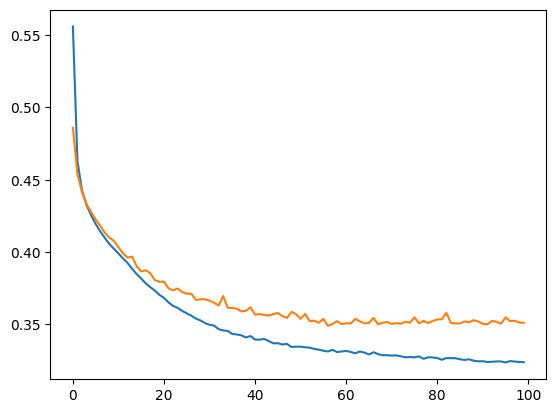

In [81]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

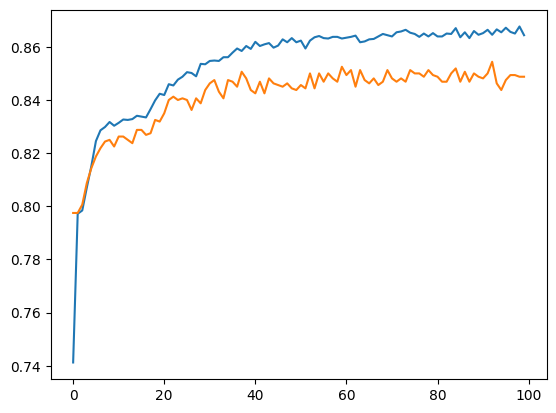

In [82]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])